In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**SOAL NO 1**

a. Download dataset produk_elektronik.csv yang ada pada link berikut
https://bit.ly/dataprodukelektronik


In [2]:
df = pd.read_csv('D:/UNNES/Semester 4/Penambangan Data dan Analisis Bisnis/produk_elektronik.csv')
df.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


b. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan hasil output di atas, dapat disimpulkan bahwa dataset tersebut memiliki total 7 kolom, dengan jumlah maksimum baris untuk setiap kolom sebanyak 550 baris. Namun, terdapat beberapa kolom yang memiliki jumlah baris kurang dari 550, sehingga diperlukan proses identifikasi lebih lanjut.

Tipe data yang digunakan untuk setiap variabel adalah sebagai berikut:
1. Integer: produk_id
2. Object (string): nama_produk, kategori, negara_asal
3. Float: harga, rating, jumlah_ulasan

In [4]:
df.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [5]:
df.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [6]:
np.sum(df.isnull())

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64

Berdasarkan hasil ringkasan tersebut, diketahui bahwa kolom yang mengandung Missing Values (kosong/N/A (Python: nan atau NaN)) adalah harga, rating, dan jumlah_ulasan.

**SOAL NO 2**

a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?

In [7]:
np.sum(df.isnull())

produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64

Jumlah missing value di setiap kolom :
- Missing value di kolom harga adalah 30
- Missing value di kolom rating adalah 50
- Missing value di kolom jumlah_ulasan adalah 20

b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.

Missing values dapat memengaruhi analisis data dalam beberapa cara:
1. Menghambat visualisasi data – Jika terdapat terlalu banyak missing values, representasi data dalam bentuk grafik bisa menjadi tidak akurat atau sulit dibuat.
2. Bias dalam hasil analisis – Jika data yang hilang tidak tersebar secara acak (misalnya, hanya pada produk tertentu), maka hasil analisis bisa menjadi bias dan tidak mencerminkan kondisi sebenarnya.
3. Gangguan pada perhitungan statistik – Banyak teknik analisis seperti rata-rata, median, atau regresi memerlukan data yang lengkap. Jika terdapat missing values, perhitungan ini bisa menjadi tidak valid atau kurang akurat.
4. Penurunan akurasi model prediksi – Jika data digunakan untuk membangun model statistik atau machine learning, missing values dapat menyebabkan penurunan akurasi model.

c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut.

In [8]:
numerical_cols = ["harga", "rating", "jumlah_ulasan"]

# Uji normalitas dengan Shapiro-Wilk, D’Agostino’s K², dan Kolmogorov-Smirnov
for col in numerical_cols:
    data = df[col].dropna()  # Hilangkan NaN jika ada
    
    shapiro_test = stats.shapiro(data)
    dagostino_test = stats.normaltest(data)
    ks_test = stats.kstest(data, 'norm')

    print(f"\nNormality test for {col}:")
    print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue}")
    print(f"D’Agostino’s K² Test: p-value = {dagostino_test.pvalue}")
    print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue}")


Normality test for harga:
Shapiro-Wilk Test: p-value = 1.1826805198256674e-39
D’Agostino’s K² Test: p-value = 9.94693479302005e-176
Kolmogorov-Smirnov Test: p-value = 0.0

Normality test for rating:
Shapiro-Wilk Test: p-value = 8.553801348177478e-11
D’Agostino’s K² Test: p-value = 5.708939733178346e-44
Kolmogorov-Smirnov Test: p-value = 0.0

Normality test for jumlah_ulasan:
Shapiro-Wilk Test: p-value = 6.198018105405025e-12
D’Agostino’s K² Test: p-value = 5.937366198993208e-73
Kolmogorov-Smirnov Test: p-value = 0.0


Berdasarkan hasil uji normalitas, diketahui bahwa kolom harga, rating, dan jumlah_ulasan memiliki data yang tidak berdistribusi normal. Oleh karena itu, kita dapat menggunakan imputasi median karena lebih tahan terhadap outlier dan tidak akan mengubah distribusi data.

d. Tangani missing values dengan metode yang sesuai

In [9]:
df['harga']=df['harga'].fillna(df['harga'].median())
df['rating']=df['rating'].fillna(df['rating'].median())
df['jumlah_ulasan']=df['jumlah_ulasan'].fillna(df['jumlah_ulasan'].median())

np.sum(df.isnull())

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64

Dengan menggunakan imputasi median, missing values berhasil diatasi.

**SOAL NO 3**

a. Identifikasi outlier dalam dataset

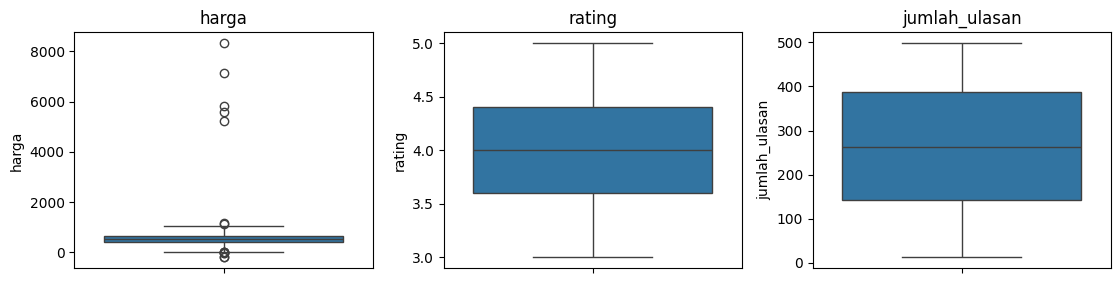

In [10]:
# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil 1
    Q3 = df[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Terdapat outlier pada kolom harga sebanyak 14 data outlier.

b. Apa dampak dari keberadaan outlier terhadap analisis?

Outlier dapat memberikan dampak signifikan terhadap analisis data, terutama dalam perhitungan statistik dan pemodelan. Berikut adalah beberapa dampaknya:

1. Mengganggu Asumsi Statistik : Banyak metode statistik seperti regresi linier dan uji t mengasumsikan bahwa data terdistribusi normal. Kehadiran outlier dapat menyebabkan skewness yang tinggi, sehingga hasil analisis menjadi bias atau tidak valid.
2. Mempengaruhi Nilai Statistik Deskriptif : Outlier dapat menyebabkan mean (rata-rata) menjadi tidak representatif karena nilai ekstrem yang terlalu tinggi atau terlalu rendah. Selain itu, standar deviasi menjadi lebih besar, sehingga menyebabkan kesalahan dalam interpretasi variabilitas data.
3. Mempengaruhi Model Prediktif : Dalam machine learning atau regresi, outlier dapat menarik model ke arah yang salah, sehingga menyebabkan model menjadi overfitting atau menghasilkan prediksi yang kurang akurat.


c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.


- Winsorizing : 
Winsorizing merupakan teknik untuk menjaga kestabilan data tanpa menghilangkan informasi penting. Outlier dapat mengganggu perhitungan statistik seperti rata-rata dan standar deviasi, tetapi menghapus data bisa menyebabkan kehilangan informasi yang berharga. Dengan mengganti outlier menggunakan batas atas atau bawah dari IQR (Interquartile Range), pola distribusi data tetap mendekati realitas tanpa dipengaruhi oleh nilai ekstrem yang dapat merusak hasil analisis.

d. Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani 
outlier berikan alasannya.

In [12]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['harga'] = np.where(df['harga'] > upper_bound, upper_bound, df['harga'])
df['harga'] = np.where(df['harga'] < lower_bound, lower_bound, df['harga'])

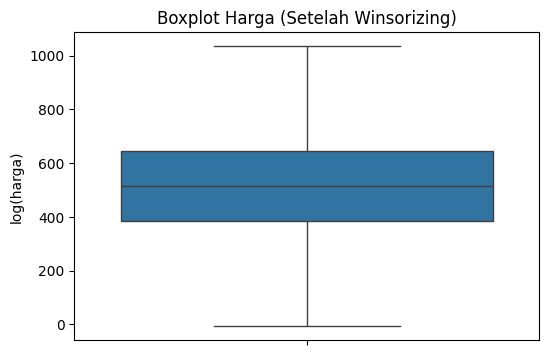

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['harga'])
plt.title("Boxplot Harga (Setelah Winsorizing)")
plt.ylabel("log(harga)")
plt.show()

**SOAL NO 4**

a. Tentukan kolom mana yang memerlukan encoding.


In [14]:
df['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [29]:
df['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

Berikut adalah kolom yang memerlukan encoding, yakni :
- kategori → karena berisi data kategorikal (Smartwatch, Headphone, Tablet, dll.).
- negara_asal → karena berisi nama negara yang bersifat kategorikal (Japan, Canada, South Korea, dll.).

b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk 
setiap kolom. Jelaskan alasan pemilihan metode tersebut

**Metode Encoding**
- Kolom Kategori menggunakan One-Hot Encoding (OHE) : Kolom kategori dikodekan menggunakan One-Hot Encoding karena jumlah kategori tidak terlalu banyak dan tidak memiliki hubungan ordinal antar kategori. Pendekatan ini memungkinkan setiap kategori direpresentasikan dalam bentuk vektor biner, sehingga mempermudah proses analisis tanpa menimbulkan bias urutan.
- Kolom negara asal dikodekan menggunakan Regional Encoding karena negara dapat dikelompokkan berdasarkan wilayah geografis. Metode ini lebih efisien dibandingkan One-Hot Encoding dan mampu menangkap hubungan semantik antar negara, sehingga model dapat memahami pola geografis dengan lebih baik.